# Chapter 4: Training Models

## Linear Regression

The goal of a linear regression model is given a training set $\mathbf{X}$ of <i>n</i>-dimensional input vectors
$\mathbf{x}^{(i)}$, we want to find an <i>n</i>-dimensional vector $\theta$ that minimizes

$$ MSE\,(\mathbf{X}, h_{\theta}) =
\large{\frac{1}{n}}\sum\limits_{i=1}^n \left( \theta^T \cdot \mathbf{x}^{(i)} - y^{(i)} \right)^2 $$

where $MSE$ is the mean squared error of the training set.

### The Normal Equation

One way to find $\theta$ is to use the <i>normal equation</i>:

$$\hat{\theta} = \left( \mathbf{X}^T \cdot \mathbf{X} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}.$$

The example below illustrates how this can equation can be used to train a linear regression model.

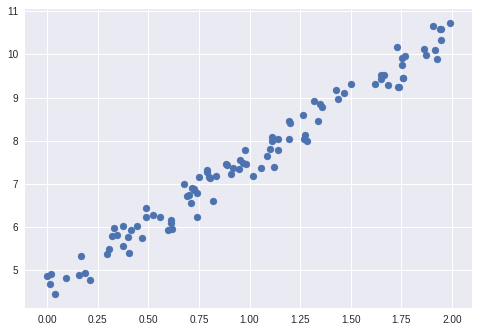

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.show()

In [7]:
# Computing theta using the np.linalg module. It is not quite (4, 3) as we might
# expect due to the noise.

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.6257677 ]
 [2.94059603]]


In [13]:
# Making a prediction using the computed values of theta.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.6257677 ],
       [10.50695976]])

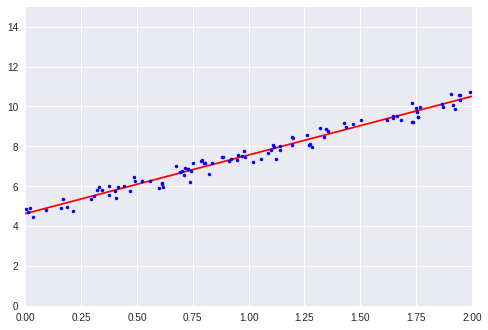

In [14]:
# Plot the model's prediction.

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
# Equivalent scikit-learn code, we see that we get the same results
# as when we use the normal equation.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.6257677] [[2.94059603]]
[[ 4.6257677 ]
 [10.50695976]]


### Computational Complexity

The normal equation computes the inverse of $\mathbf{X}^T \cdot \mathbf{X}$, which is an $O\left(n^3\right)$ operation. This does not scale well for large datasets.

## Gradient Descent

### Batch Gradient Descent

Gradient descent is the process of tweaking parameters slightly until a global minimum is found in the target space
of the cost function.

In the case of linear regression, the partial derivative of each parameter in $\theta$ is

$$ \frac{\partial}{\partial\theta_j}\;MSE\,(\theta) =
\frac{2}{m} \sum\limits_{i=1}^n \left( \theta^T\cdot\mathbf{x}^{(i)} \right) x^{(i)}_j. $$

The gradient of the cost function is given by

$$ \nabla_{\theta}\;MSE\,(\theta) = \frac{2}{n} \; \mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - y). $$

The gradient vector points in the direction of most change in the positive direction, so one iteration of
gradient descent is computed as

$$ \theta^{(\text{next step})} = \theta - \eta \, \nabla_{\theta}\;MSE\,(\theta) $$

where $\eta$ is the <i>learning rate</i> of the algorithm.

In [16]:
# An implmentation of gradient descent. As we can see the result is the same as when
# we used the normal equation.

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for _ in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)
    
print(theta)

[[4.6257677 ]
 [2.94059603]]


### Stochastic Gradient Descent

Batch gradient descent can be inefficient since it uses all values in the training set at each step to compute
the gradient, thereby making it an $O\left(n^2\right)$ operation. It also has trouble escaping from global minima.

An alternative is stochastic gradient descent, which picks a single point randomly and computes the gradient using
that one point.

In [11]:
# Implementation of stochastic gradient descent.

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

n = len(X)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(n):
    random_index = np.random.randint(n)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta -= eta * gradients
    
print(theta)

[[4.61406416]
 [2.94984114]]


In [12]:
# Scikit-Learn's SGDRegressor implements this algorithm.

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, tol=1e-3)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.61737978] [2.95516511]


### Mini-batch Gradient Descent

This algorithm computes the gradient using randomly selected samples from the training set, i.e. "mini-batches." This has an advantage over stochastic gradient descent because the matrix multiplication can be improved using optimized hardware.

## Polynomial Regression

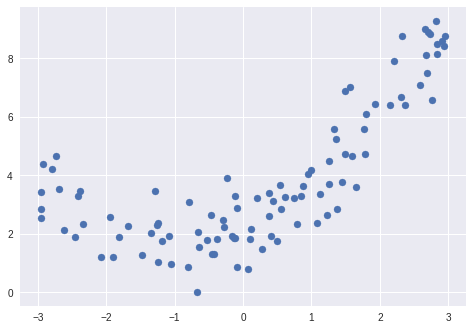

In [19]:
# Generate nonlinear data using a simple quadratic equation.

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [20]:
# Using Scikit-Learn's PolynomialFeatures transformer to add the 2nd degree of
# the polynomial in the feature set as a new feature

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.11924681]
[1.11924681 1.25271343]


In [21]:
# Now we are able to use the LinearRegressor to predict the data.

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.21853043]), array([[0.93578895, 0.4722543 ]]))

## Learning Curves

In [0]:
# The following code defines a function for plotting the learning curve of a
# model, a plot of the performance of the model on the training and validation
# set as a function of the training set size.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.axis([0, 80, 0, 3])
  plt.legend()
  plt.show()

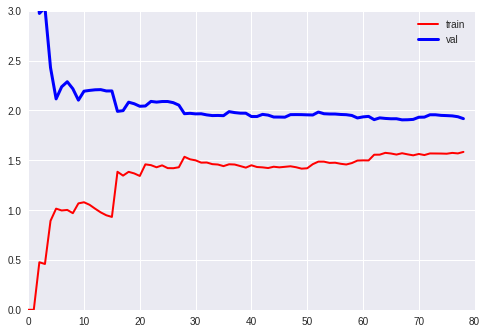

In [24]:
# Plotting the learning curve for linear regression. This is an example of
# an underfitting model, they plateau at a high level.

lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

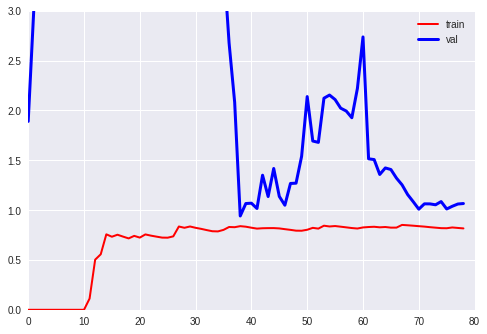

In [25]:
# Plotting the learning curve of a 10 degree polynomial model. This
# is an example of an overfitting model, since there is a large
# gap between the training set error and the validation set error.

from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curve(poly_regression, X, y)

## Regularized Linear Models

### Ridge Regression

A form of regularized Linear Regression where the <i>regularization</i> term is given by

$$ \alpha \sum\limits_{i=1}^n \; \theta_i^2 $$,

where $\alpha$ is a configurable hyperparameter. If $\alpha=0$ then the Ridge Regression becomes Linear Regression.
The ridge regression cost function is

$$ J(\theta) = MSE\,(\theta) + \frac{\alpha}{2} \sum\limits_{i=1}^n \, \theta_i^2 $$.

The Ridge Regression closed-form solution is given by

$$ \hat{\theta} =
\left( \mathbf{X}^T \cdot \mathbf{X} + \alpha\mathbf{A} \right)^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$.

where $\mathbf{A}$ is the $n \times n$ identity matrix.

In [0]:
# An implementation of Ridge Regression using the closed form solution.

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.04832376]])

In [0]:
# You can also use Ridge Regression regularization when using Stochastic
# Gradient Descent. It throws a warning but seems to work fine.

sgd_reg = SGDRegressor(penalty='l2', max_iter=100, tol=1e-3)
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.03970027])

### Lasso Regression

The Lasso Regression cost function is given by
  
$$ J(\theta) = MSE\,(\theta) \, + \sum\limits_{i=1}^n\left| \theta_i \right| $$

which is identical to the Ridge Regression cost function except it uses the $\ell_1$ norm (Manhattan distance) instead of the $\ell_2$ norm (Euclidean metric).

The lasso cost function is sometimes non-differentiable because of the absolute value. Gradient descent still works if you use the <i>subgradient vector</i>, $\mathbf{g}$, which is given by

$$ \mathbf{g}\,(\theta, J) = \nabla_\theta MSE\,(\theta)\; + \,
\alpha \, \left( \begin{matrix} sign\,(\theta_1) \\ sign\,(\theta_2) \\ \vdots \\
sign\,(\theta_n) \end{matrix} \right) $$

where

$$ sign\,(\theta_i) = \left\{ \begin{matrix}
-1 \; \text{if} \; \theta_i < 0 \\
0 \; \text{if} \; \theta_i = 0 \\
1 \; \text{if} \; \theta_i > 0
\end{matrix} \right. $$

In [0]:
# Lasso Regression is implemented by Scikit-Learn

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00532097])

### Elastic Net

The cost function of Elastic Net is given by

$$ J(\theta) = MSE\,(\theta) \; + \; r\alpha \sum\limits_{i=1}^n 
\left| \theta_i \right| \; + \; \frac{\alpha\,(1-r)}{2}
\sum\limits_{i=1}^n \theta_i^2 $$

where $r$ is a mix ratio and can range from 0 to 1. Elastic Net can be preferable to Lasso Regression due to the fact that Lasso Regression behaves eratically when the number of features is greater than the number of samples in the training set or when features are strongly correlated.

In [0]:
# Scikit-Learn implements Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.2, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.96067782])

### Early Stopping

In [40]:
# A basic implementation of early stopping, when a model halts
# gradient descent when the validation error hits a minimum.

from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import warnings

# Silencing warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True means the model picks up where it left off
# each time fit() is called.
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005, tol=1e-3)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=True)

## Logistic Regression

### Estimating Probabilities

Logistic Regression is a binary classification model which attempts to predict the probability that a sample is in the positive class. If the probability is greater than 0.5, then it outputs the sample is in the positive class, 1, otherwise it is in the negative class, 0.

The probability predicted by Logistic Regression is given by

$$ \hat{p} = h_\theta (\mathbf{x}) = \sigma\left( \theta^T \cdot \mathbf{x}
\right) $$

where $\sigma(t)$ is a <i>signoid function</i> that outputs a number from 0 to 1. It is defined as

$$ \sigma(t) = \frac{1}{1 + \exp\,(-t)}. $$

The final output of logistic regression is given by

$$ \hat{y} = \left\{ \begin{matrix}
0 & \text{if} \; \hat{p} < 0.5 \\
1 & \text{if} \; \hat{p} \geq 0.5
\end{matrix} \right. $$

It follows from the defition of $\sigma$ that $\hat{p}$ is less than 0.5 when $t < 0$, so Logistic Regression predicts 1 if $\theta^T\cdot\mathbf{x}$ is positive or zero, and predicts 0 if it is negative.

### Training and Cost Function

The cost function for a single sample, $\mathbf{x}$ is given by

$$ c(\theta) = \left\{ \begin{matrix}
- \log(\hat{p}) & \text{if} \; y = 1 \\
- \log(1 - \hat{p}) & \text{if} \; y = 0
\end{matrix} \right. $$

Because $-log(t)$ grows large when $t$ approaches zero, so the cost function will be large when it estimates a value close to zero for a positive class and very large when a negative class is close to 1 (recall the range of $\sigma$ is $[0, 1]$).

The total cost function is the mean of the cost for each sample in the training set, given by

$$ J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^m
\left[ y^{(i)}\log\left( \hat{p}^{(i)} \right) +
\left( 1 - y^{(i)} \right) \log\left( 1 - \hat{p}^{(i)} \right) \right]. $$

There is no known closed form solution for finding the best choice of $\theta$, but since the cost function is convex, Gradient Descent can find a solution. The partial derivative of the cost function with respect to each component of $\theta$ is given by

$$ \frac{\partial}{\partial \theta_j} J(\theta) =
\frac{1}{m} \sum\limits_{i=1}^m \left(
\sigma\left( \theta^T \cdot \mathbf{x}^{(i)} \right)
- y^{(i)}\right) x^{(i)}_j$$

which can be used to compute the gradient.

### Decision Boundaries

In [42]:
# Importing the Iris dataset.

from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 is Iris-Virginica, else 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [0]:
# Training a LogisticRegression model.

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='sag').fit(X, y)

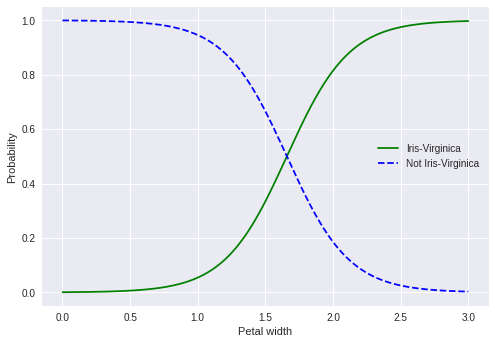

In [51]:
# Plotting the decision boundary.

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend()
plt.ylabel('Probability')
plt.xlabel('Petal width')
plt.show()

In [53]:
# Example predictions.

log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

Logistic Regression can support multiple classes directly, this is called <i>Softmax Regression</i> or <i>Multinomial Logistic Regression</i>.

Given a sample, $\mathbf{x}$, the model first computes the scores of each class $s_k(\mathbf{x})$ which is given by

$$ s_k(\mathbf{x}) = \left( \theta^{(k)}  \right)^T \cdot \mathbf{x} $$

which is the equation for the Linear Regression prediction. The model then estimates the probability of the sample is in each class by applying the <i>softmax function</i> (or <i>normalized exponential</i>) given by

$$ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp\,\left( s_k (\mathbf{x}) \right)}
{\sum\limits_{j=1}^K \, \exp\, \left( s_j(\mathbf{x}) \right) } $$

where $K$ is the number of classes, $\mathbf{s}(\mathbf{x})$ is the vector containing the scores for each class, and $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the probability that $\mathbf{x}$ is in class $k$.

Like the Linear Regression classifier, the model predicts that the sample, $\mathbf{x}$, is in the class $\hat{y}$, given by

$$ \hat{y} =
\underset{k}{\text{argmax}} \; \sigma(\mathbf{s}(\mathbf{x}))_k =
\underset{k}{\text{argmax}} \; s_k(\mathbf{x}) =
\underset{k}{\text{argmax}} \, \left( \left( \theta^{(k)} \right)^T
\cdot \mathbf{x} \right) $$

where the $\text{argmax}$ operator selects the parameter $k$ which maximizes the function. In order to find the optimal $\Theta$, the matrix of vectors used for each class for scoring, the model must minimize the <i>cross-entropy</i> cost function which is given by

$$ J(\Theta) = - \frac{1}{m} \sum\limits_{i=1}^m
\sum\limits_{k=1}^K \, y_k^{(i)} \log\left( \hat{p}_k^{(i)} \right) $$

where $y_k^{(i)}$ is 1 if the target class for the $i^{\text{th}}$ instance is $k$; otherwise it is 0. The model is penalized when it estimates a low probability for a target class. When $K=2$, the cost function is the same as Logistic Regression. The gradient vector with respect to $\theta^{(k)}$ for this cost function is given by

$$ \nabla_{\theta^{(k)}} = \frac{1}{m} \sum\limits_{i=1}^m
\left( \hat{p}_k^{(i)} - y_k^{(i)} \right) \mathbf{x}^{(i)} $$

which can be used for Gradient Descent.

In [55]:
# Using Softmax Regression with the Iris dataset.

X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs', C=10)
softmax_reg.fit(X, y)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
